# CS624 Final Project

* MAE -(Mean Absolute Error): The average of the absolute differences between predicted and actual values.
* MSE -(Mean Squared Error): The average of the squares of the differences between predicted and actual values.
* RMSE -(Root Mean Squared Error): The square root of the MSE, providing a measure of the spread of errors.
* MAPE -(Mean Absolute Percentage Error): The average of the absolute percentage differences between predicted and actual values.
* SMAPE -(Symmetric Mean Absolute Percentage Error): A symmetric version of MAPE that calculates the percentage error between predicted and actual values.

## Cross Validation and Models training 

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression, GeneralizedLinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor, IsotonicRegression, FMRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from pyspark import SparkConf
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

import pandas as pd
import numpy as np

#Mlfow
import mlflow
import mlflow.spark
from mlflow.models.signature import infer_signature

In [0]:
spark

In [0]:
class DataParquet:
    def __init__(self, app_name="DataParquet"):
        """
        Initializes a Spark session.

        Args:
        - app_name: Name of the Spark application.
        """
        conf = SparkConf()
        conf.set("spark.executor.memory", "20g")
        conf.set("spark.driver.memory", "10g")
        conf.set("spark.executor.cores", "4")
        conf.set("spark.default.parallelism", "200")
        conf.set("spark.sql.shuffle.partitions", "200")
        conf.set("spark.executor.extraJavaOptions", "-XX:+UseG4GC")
        conf.set("spark.dynamicAllocation.enabled", "true")
        conf.set("spark.shuffle.service.enabled", "true")
        conf.set("spark.memory.fraction", "0.7")
        conf.set("spark.memory.storageFraction", "0.5")
        self.spark = SparkSession.builder \
            .appName(app_name) \
            .config(conf=conf) \
            .getOrCreate()


    def read_parquet(self, file_path, header=True, infer_schema=True):
        """
        Reads a Parquet file into a DataFrame.

        Args:
        - file_path: Path to the Parquet file.
        - header: Whether the Parquet file has a header row.
        - infer_schema: Whether to infer the data types of columns.

        Returns:
        - DataFrame: The DataFrame containing the Parquet data.
        """
       
        return self.spark.read.parquet(file_path, header=header, inferschema=True)


    def stop(self):
        """
        Stops the Spark session.
        """
        self.spark.stop()



In [0]:
dp = DataParquet(app_name="DataParquet")
URL="/FileStore/tables/parquet_data/standard_data.parquet"
scaled_df = dp.read_parquet(URL)
scaled_df.display()

scaled_features Close Map(vectorType -> dense, length -> 20, values -> List(-0.3991097536861598, -0.39989163956787993, -0.39962008443436703, -0.39917351644694554, -0.41098301312440355, -0.41090879931523966, -0.43051575783846413, -0.4303578161328014, -0.4088241660865288, -0.42346164629532146, -0.42342103334366193, -0.41098536036419003, -0.4235016209438836, -0.4110761647499234, -0.42035255712918085, -0.42042458076893946, -0.420568158627011, -0.020780495135526388, -0.04149534920613671, -0.39961218528473813)) 2414.0 Map(vectorType -> dense, length -> 20, values -> List(-0.6414568227271232, -0.6415236532295993, -0.6415031734443062, -0.6414943309425801, -0.6424140285930345, -0.6423546200778344, -0.6545580878367974, -0.6544972220016158, -0.6429198768995711, -0.6456203645699209, -0.6455626976512445, -0.6424130906739438, -0.6456238313363414, -0.6424553328692024, -0.647694171025163, -0.6477534614504633, -0.6477981746137057, -0.02119154823052306, -0.1827329420729124, -0.6414851275372869)) 238.0 Map(vectorType -> dense, length -> 20, values -> List(-0.6394992759389257, -0.6396324266033335, -0.6395717769959847, -0.6395629895885151, -0.640073991952255, -0.6400204555621268, -0.6532713950529212, -0.65321426218047, -0.6406734953731579, -0.6438935624008102, -0.6438345108367801, -0.6400829277034965, -0.6438974457964886, -0.6401213049871911, -0.6458461060449705, -0.6459053434461017, -0.6459498728960456, -0.021190984494920292, -0.17919801080564363, -0.6395677064647426)) 255.25 Map(vectorType -> dense, length -> 20, values -> List(-0.6380415283306935, -0.6381027580085598, -0.6380850185789314, -0.6380762735821486, -0.6392489153117084, -0.6391881024284405, -0.6523202722509862, -0.6522621908194504, -0.6396438369184051, -0.6427072311239489, -0.6426505467775852, -0.6392458981723035, -0.6427134120618352, -0.6392776325046909, -0.6447093749591816, -0.6447681993661747, -0.644810107713358, -0.02119136128691644, -0.18101752178541672, -0.6380671160601427)) 268.75 Map(vectorType -> dense, length -> 20, values -> List(-0.6424980710187177, -0.6425666090896723, -0.6425452938300913, -0.6425364216012482, -0.6430840305878882, -0.6430300378951455, -0.6520258021119766, -0.6519700082847597, -0.6436870603251447, -0.6457681896543411, -0.6457043446697394, -0.6431149230362031, -0.6457865835117625, -0.6431617095939371, -0.647755712056681, -0.6478188437108959, -0.6478869771420542, -0.021191128281734365, -0.17993225523035822, -0.642527204207148)) 228.625 Map(vectorType -> dense, length -> 20, values -> List(-0.6389855934484058, -0.6391318077904985, -0.6391132440262393, -0.63907668061447, -0.640398058199024, -0.6403363127178694, -0.653927890245184, -0.6538710041835927, -0.6408896698408691, -0.6446261592702871, -0.6445655771921036, -0.6404288734004742, -0.6446347271413042, -0.6404834474207172, -0.6464791504245124, -0.646541468069637, -0.6466021851539709, -0.021191061834797343, -0.1788219821539833, -0.6390952983744056)) 259.5 Map(vectorType -> dense, length -> 20, values -> List(-0.61704996277215, -0.6170767678694875, -0.6170758716015056, -0.6170677259033986, -0.6182939567783048, -0.6182739883677013, -0.6341083177125431, -0.6340614374185819, -0.6186680778578145, -0.622469650639189, -0.6224397537702486, -0.6183102189241723, -0.6224789797079137, -0.618317146819178, -0.6243544197551042, -0.624386728816973, -0.6244261854072108, -0.021191359419551702, -0.1808312718678848, -0.6170588503957439)) 457.75 Map(vectorType -> dense, length -> 20, values -> List(-0.6243248175027564, -0.6245026135932075, -0.6243846092404778, -0.6244874113931158, -0.6267037741024316, -0.6266293040724381, -0.6338440819407472, -0.6337879784819678, -0.6270164692168713, -0.6300269166269308, -0.6299563646332685, -0.6267003961727111, -0.6300280691512251, -0.6267299941210908, -0.6311141724877517, -0.6311830594929259, -0.6312219834813588, -0.02118951633403382, -0.17362051683671664, -0.6244506475739583)) 391.25 Map(vectorType -> dense, length -> 20, values -> List(-0.626684980297037, -0.6267275860946966, -0.6267189589046

## Spliting dataset into train and test

In [0]:
# Split data into training and testing sets
(training_data, test_data) = scaled_df.randomSplit([0.8, 0.2], seed=42)



## Evaluating models

In [0]:
class SelectBestModel:

    def GetModelScore(self,training_data,test_data,target_column='Close'):
        # Initialize regression models
        models = [
            #LinearRegression(featuresCol="scaled_features", labelCol="Close"), # Very slow in single node
            #GeneralizedLinearRegression(featuresCol="scaled_features", labelCol="Close", family="gaussian", link="identity"),
            #GeneralizedLinearRegression(featuresCol="scaled_features", labelCol="Close", family="gaussian", link="log"),
            #GeneralizedLinearRegression(featuresCol="scaled_features", labelCol="Close", family="poisson", link="log"),
            #GeneralizedLinearRegression(featuresCol="scaled_features", labelCol="Close", family="gamma", link="inverse"),
            #GeneralizedLinearRegression(featuresCol="scaled_features", labelCol="Close", family="binomial", link="logit"),
            #GeneralizedLinearRegression(featuresCol="scaled_features", labelCol="Close", family="tweedie", link="log"),
            DecisionTreeRegressor(featuresCol="scaled_features", labelCol="Close"),
            RandomForestRegressor(featuresCol="scaled_features", labelCol="Close"),
            GBTRegressor(featuresCol="scaled_features", labelCol="Close"),
            IsotonicRegression(featuresCol="scaled_features", labelCol="Close"),
            #FMRegressor(featuresCol="scaled_features", labelCol="Close")
            ]
        results =[]
        for model in models:
            with mlflow.start_run(run_name=f'{model} Selection'):
                model_name = model.__class__.__name__
                print(f"Training {model_name}...")
                model_fit = model.fit(training_data)
        
                # Log model
                mlflow.spark.log_model(model_fit, "model")

                # Make predictions
                predictions = model_fit.transform(test_data)

                # Evaluate model using Spark's RegressionEvaluator
                evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="mae")
                mae = evaluator.evaluate(predictions)
                mlflow.log_metric("MAE", mae)

                evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="mse")
                mse = evaluator.evaluate(predictions)
                mlflow.log_metric("MSE", mse)

                evaluator = RegressionEvaluator(labelCol="Close", predictionCol="prediction", metricName="rmse")
                rmse = evaluator.evaluate(predictions)
                mlflow.log_metric("RMSE", rmse)

                # Calculate and log MAPE and SMAPE
                target_values = predictions.select("Close").rdd.flatMap(lambda x: x).collect()
                predicted_values = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
                mape = np.mean(np.abs((np.array(target_values) - np.array(predicted_values)) / np.array(target_values))) * 100
                smape = 100 * np.mean(2 * np.abs(np.array(target_values) - np.array(predicted_values)) / (np.abs(np.array(target_values)) + np.abs(np.array(predicted_values))))
        
                mlflow.log_metric("MAPE", mape)
                mlflow.log_metric("SMAPE", smape)

                # Optionally, log other artifacts or parameters if needed
                mlflow.log_param("Model Type", model_name)

                results.append((model_name, mae, mse, rmse, mape, smape))

                # End this MLflow run
                mlflow.end_run()

        # Display results
        result_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "MAPE", "SMAPE"])
        print(result_df)


reg = SelectBestModel()

In [0]:
reg.GetModelScore(training_data,test_data)

Training DecisionTreeRegressor...


2024/04/21 07:16:03 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/21 07:16:44 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/3962116924833118/7feb29ce578b42d69e6f867d2aeaa1ea/artifacts/model/sparkml, flavor: spark), fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback.
/databricks/python/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Training RandomForestRegressor...


2024/04/21 07:20:55 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/21 07:20:57 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
2024/04/21 07:21:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/3962116924833118/faae09a4d00c45ff85648d483ca0b8b0/artifacts/model/sparkml, flavor: spark), fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Training GBTRegressor...


2024/04/21 07:29:05 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/21 07:29:06 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
2024/04/21 07:29:43 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/3962116924833118/296cdb03ffe54c76b7fc78adc0bbcf6b/artifacts/model/sparkml, flavor: spark), fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Training IsotonicRegression...


2024/04/21 07:32:42 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/21 07:33:21 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/3962116924833118/8ef37190842e419383cabbbca7047fa8/artifacts/model/sparkml, flavor: spark), fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

                   Model         MAE  ...       MAPE      SMAPE
0  DecisionTreeRegressor  381.060994  ...  28.450069  13.676225
1  RandomForestRegressor  542.093843  ...  30.568172  14.494179
2           GBTRegressor  347.301550  ...  14.546210   8.616710
3     IsotonicRegression    4.290690  ...   0.084263   0.084115

[4 rows x 6 columns]


## Performing Cross Validation 

In [0]:

class PerformCV:

    def CrossValidation(self,training_data,test_dat,target_column='Close'):

        with mlflow.start_run(run_name='Cross Validation on Isotonic Regressor'):
        
            # Define evaluation metric
            evaluator = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="rmse")

            # Define parameter grid
            paramGrid = ParamGridBuilder() \
                .addGrid(IsotonicRegression.isotonic, [True, False]) \
                .build()


            # Initialize CrossValidator
            crossval = CrossValidator(estimator=IsotonicRegression(featuresCol="scaled_features", labelCol=target_column),
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)  # 5 folds cross-validation

            mlflow.log_params({"numFolds": 5, "metricName": "rmse"})
            
            # Perform cross-validation and select the best model
            cvModel = crossval.fit(training_data)

            avg_rmse = np.mean(cvModel.avgMetrics)
            mlflow.log_metric("Average RMSE", avg_rmse)

            # Print the evaluation metrics on each fold
            print("Evaluation metrics on each fold:")
            for i, metric in enumerate(cvModel.avgMetrics):
                print(f"Fold {i+1}: RMSE={metric:.4f}")
                mlflow.log_metric(f"Fold {i+1} RMSE", metric)

            # Get the best model from cross-validation
            best_model = cvModel.bestModel
            mlflow.spark.log_model(best_model, "best_model")

            # Extract the best parameter values
            best_params = best_model.extractParamMap()
            mlflow.log_params(best_params)

        return best_params


pcv =PerformCV()

In [0]:
best_params=pcv.CrossValidation(training_data,test_data)
print("Best parameters:")
for param, value in best_params.items():
    print(f"{param.name}: {value}")

Evaluation metrics on each fold:
Fold 1: RMSE=11.5599
Fold 2: RMSE=11.5599


2024/04/21 07:44:19 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/21 07:44:57 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/3962116924833118/d8a875bb550a49b9919b2dcf4158668c/artifacts/best_model/sparkml, flavor: spark), fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Best parameters:
featureIndex: 0
featuresCol: scaled_features
isotonic: True
labelCol: Close
predictionCol: prediction


## Train and Predict  on best params

In [0]:
class TrainPredict:
    # Define function to calculate MAPE and SMAPE
    def __calculate_mape_smape(self,target_values, predicted_values):
        absolute_errors = np.abs(np.array(target_values) - np.array(predicted_values))
        target_values_abs = np.abs(np.array(target_values))
        mape = np.mean(absolute_errors / target_values_abs) * 100
        smape = 100 * np.mean(2 * absolute_errors / (target_values_abs + np.abs(np.array(predicted_values))))
        return mape, smape


    def TrainBestModel(self,best_params,training_data,test_data,target_column='Close'):
        
        with mlflow.start_run(run_name='Train and Predict Isotonic Regressor Model'):
    
            # Log parameters used for the model
            mlflow.log_param("isotonic", True)
            evaluator = RegressionEvaluator(labelCol=target_column, predictionCol="prediction", metricName="rmse")
        
            # Initialize a new IsotonicRegression with the best parameters
            best_iso_model = IsotonicRegression(featuresCol="scaled_features", labelCol=target_column,isotonic=True)

            # Train the model on the entire training dataset
            final_model = best_iso_model.fit(training_data)

            # Log the best model
            mlflow.spark.log_model(final_model, "final_isotonic_model")

            # Make predictions on the test data
            predictions = final_model.transform(test_data)

            # Collect target and predicted values
            target_values = predictions.select(target_column).rdd.flatMap(lambda x: x).collect()
            predicted_values = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

            # Calculate MAPE and SMAPE
            mape, smape = self.__calculate_mape_smape(target_values, predicted_values)

            # Evaluate the model on the test data using RMSE
            rmse = evaluator.evaluate(predictions)

            # Log the best model
            #mlflow.spark.log_model(final_model, "final_isotonic_model", overwrite=True)

            print("\nEvaluation metrics:")
            print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")
            print(f"Mean Absolute Percentage Error (MAPE) on test data = {mape}")
            print(f"Symmetric Mean Absolute Percentage Error (SMAPE) on test data = {smape}")

            # Log RMSE
            mlflow.log_metric("RMSE", rmse)
            # Log MAPE and SMAPE
            mlflow.log_metric("MAPE", mape)
            mlflow.log_metric("SMAPE", smape)

            # Convert to Pandas DataFrame for visualization
            prediction_df = predictions.select(target_column, "prediction").toPandas()

        return final_model,prediction_df


tp = TrainPredict()

In [0]:
final_model,prediction_df=tp.TrainBestModel(best_params,training_data,test_data)



2024/04/21 07:45:58 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/21 07:46:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/3962116924833118/d3cf5afd962a44e8bd75b33dc02ffe19/artifacts/final_isotonic_model/sparkml, flavor: spark), fall back to return ['pyspark==3.5.0']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]


Evaluation metrics:
Root Mean Squared Error (RMSE) on test data = 11.618523222837922
Mean Absolute Percentage Error (MAPE) on test data = 0.08426302518940872
Symmetric Mean Absolute Percentage Error (SMAPE) on test data = 0.08411503968287756


## Plot the graph between predictions and target values

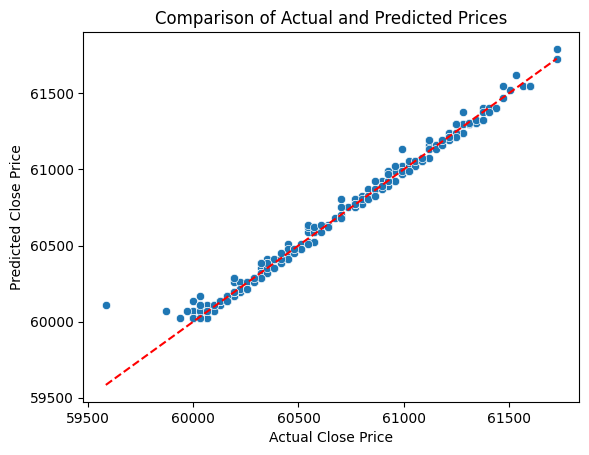

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
df = prediction_df[prediction_df['prediction']>60000]
sns.scatterplot(data=df, x='Close', y='prediction')
plt.plot([df.Close.min(), df.Close.max()], [df.Close.min(), df.Close.max()], 'r--')  # red dashed line for perfect prediction
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.show()

/root/.ipykernel/37315/command-1666976063744291-4217093694:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals'] = df['Close'] - df['prediction']


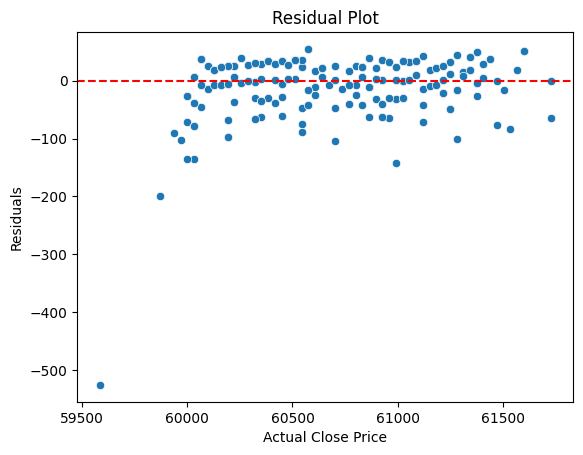

In [0]:
df['residuals'] = df['Close'] - df['prediction']

sns.scatterplot(data=df, x='Close', y='residuals')
plt.axhline(0, color='red', linestyle='--')  # Zero line for reference
plt.xlabel('Actual Close Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Saving Model 

In [0]:
model_path = "/FileStore/tables/model/isotonic_regression_model"
final_model.write().overwrite().save(model_path)